# Analisi Serie A 2019-2020 

[Si può scaricare da qui il dataset](https://www.fantacalcio.it/statistiche-serie-a/2019-20/fantacalcio/medie)

L'obiettivo di questo notebook è testare e prendere confidenza con alcune funzionalità della libreria **pandas**,in particolare mi son focalizzato su un'analisi puramente descrittiva della stagione calcistica italiana appena trascorsa(2019/2020). Il dataset, che si può scaricare [qui](https://www.fantacalcio.it/statistiche-serie-a/2019-20/fantacalcio/medie), è formato dalle principali caratteristiche sportive di ogni giocatore tesserato nella scorsa stagione. Ad ogni record del dataset corrisponde il profilo di un calciatore. Diamogli un'occhiata.

In [1]:
import pandas as pd
fc = pd.read_csv("Statistiche_Fantacalcio_2019-20.csv")
fc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 18 columns):
Id         753 non-null int64
R          753 non-null object
Nome       753 non-null object
Squadra    753 non-null object
Pg         753 non-null int64
Mv         753 non-null float64
Mf         753 non-null float64
Gf         753 non-null int64
Gs         753 non-null int64
Rp         753 non-null int64
Rc         753 non-null int64
R+         753 non-null int64
R-         753 non-null int64
Ass        753 non-null int64
Asf        753 non-null int64
Amm        753 non-null int64
Esp        753 non-null int64
Au         753 non-null int64
dtypes: float64(2), int64(13), object(3)
memory usage: 106.0+ KB


Abbiamo : 
- Id : identificativo univico per ogni giocatore
- R : ruolo del giocatore
- Squadra : squadra in cui milita il giocatore
- Pg : partite giocate dal giocatore ( senza distinzione fra partite giocate come titolare o da subentrato)
- Mv : media voto del giocatore
- Mf : media fantavoto del giocatore (ricordiamo che il fantavoto si ottiene sommando al voto di base i valori di ogni singolo bonus che il giocatore effettua nella giornata calcistica)
- Gf : gol fatti su azione dal giocatore
- Gs : gol subiti dal giocatore
- Rp : rigori parati dal giocatore
- Rc : rigori calciati dal giocatore
- R+ : rigori segnati dal giocatore
- R- : rigori sbagliati dal giocatore
- Ass : assist eseguiti in movimento dal giocatore
- Asf : assist eseguiti da fermo dal giocatore
- Amm : ammonizioni prese dal giocatore
- Esp : espulsioni prese dal giocatore
- Au : autogol segnati dal giocatore

Calcoliamo i valori della correlazione fra le caratteristiche del dataset.

In [2]:
fc.corr()

,Id,Pg,Mv,Mf,Gf,Gs,Rp,Rc,R+,R-,Ass,Asf,Amm,Esp,Au
Id,1.000000,-0.300842,-0.180109,-0.178487,-0.164636,-0.095116,-0.081007,-0.105999,-0.101691,-0.088370,-0.210413,-0.080792,-0.187176,-0.034113,-0.038870
Pg,-0.300842,1.000000,0.705005,0.720420,0.511124,0.200368,0.165087,0.253723,0.242531,0.215273,0.526453,0.227493,0.746089,0.224820,0.195888
Mv,-0.180109,0.705005,1.000000,0.977161,0.320217,0.133885,0.095334,0.141699,0.134696,0.123432,0.335779,0.141165,0.507459,0.201358,0.117373
Mf,-0.178487,0.720420,0.977161,1.000000,0.441056,0.018149,0.029567,0.217346,0.210509,0.172697,0.408545,0.161528,0.513365,0.198752,0.097490
Gf,-0.164636,0.511124,0.320217,0.441056,1.000000,-0.086788,-0.060287,0.481620,0.468825,0.372652,0.547746,0.105733,0.272186,0.075762,0.000630
Gs,-0.095116,0.200368,0.133885,0.018149,-0.086788,1.000000,0.716510,-0.038031,-0.035708,-0.035019,-0.089272,-0.039307,-0.051463,-0.052952,0.062428
Rp,-0.081007,0.165087,0.095334,0.029567,-0.060287,0.716510,1.000000,-0.026418,-0.024804,-0.024325,-0.064605,-0.027304,-0.027073,-0.044428,0.020787
Rc,-0.105999,0.253723,0.141699,0.217346,0.481620,-0.038031,-0.026418,1.000000,0.986551,0.717881,0.210777,0.143095,0.124103,-0.004819,-0.002169
R+,-0.101691,0.242531,0.134696,0.210509,0.468825,-0.035708,-0.024804,0.986551,1.000000,0.594433,0.205777,0.141888,0.118647,-0.001285,0.000773
R-,-0.088370,0.215273,0.123432,0.172697,0.372652,-0.035019,-0.024325,0.717881,0.594433,1.000000,0.160536,0.099670,0.105221,-0.018235,-0.013963


Sembra esserci una *strana* correlazione fra i gol subiti(Gs)ed i rigori parati(Rp), pari a $\sim$ 0.71 .

Iniziamo col vedere quanti giocatori ha tesserato in totale ogni squadra in tutto l'anno,escludendo le cessioni:

In [3]:
fc["Squadra"].value_counts()

Genoa         46
Fiorentina    45
Verona        43
Roma          41
Juventus      40
Bologna       39
Lecce         39
Lazio         38
Parma         38
Udinese       38
Atalanta      37
Sampdoria     37
Inter         37
Cagliari      36
Sassuolo      36
SPAL          35
Milan         34
Torino        34
Brescia       30
Napoli        30
Name: Squadra, dtype: int64

Ad esclusione del Verona, notiamo come le squadre che hanno tesserato più di quaranta giocatori non hanno fatto campionato propriamente "brillante"(ma è una considerazione  fuori dall'ambito puramente statistico...). <br> Pare proprio il caso di dire : "quantità non è sinonimo di qualità".

Passiamo alla visualizzazione dei dati utilizzando gli istogrammi:

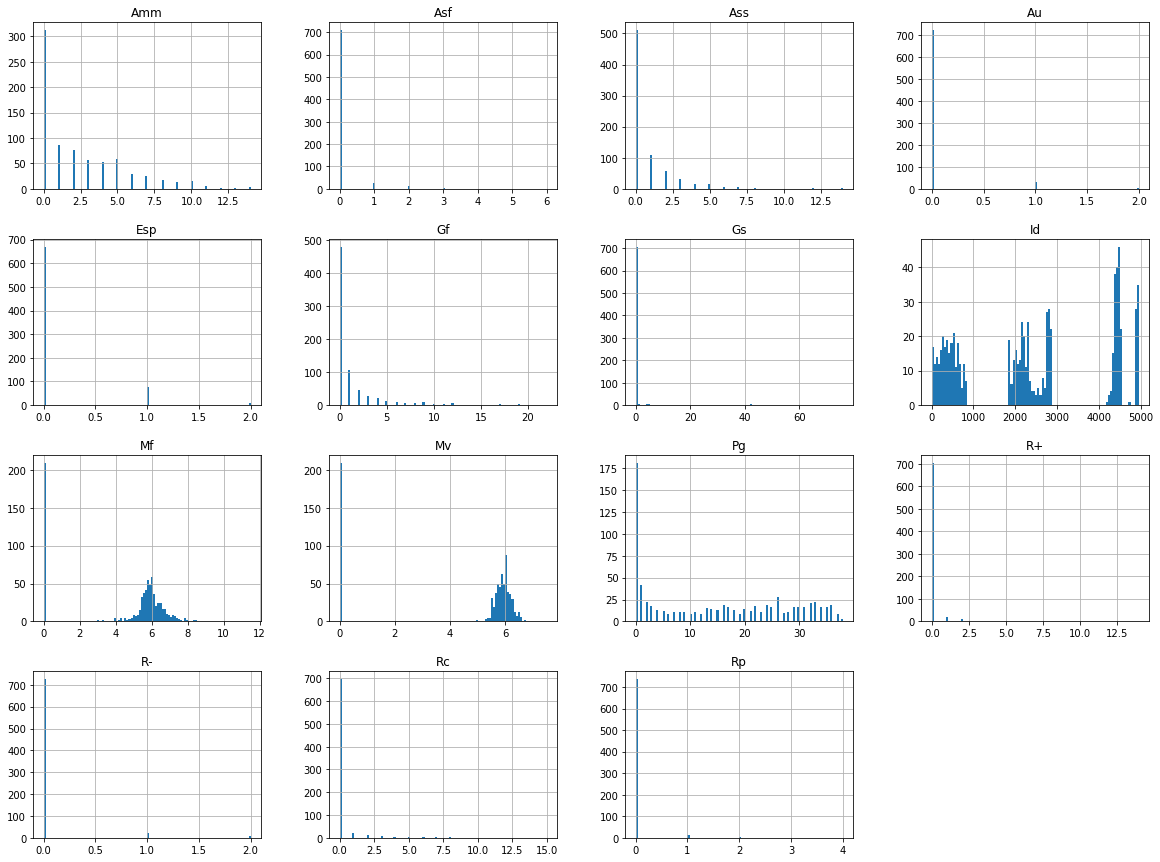

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

def df_hist(dataframe,n_of_bins):
    dataframe.hist(bins= n_of_bins, figsize =(20,15))
    plt.show()

df_hist(fc,100)

Nell'istogramma riportante le partite giocate notiamo subito che vi è un numero consistente di giocatori che non ha mai giocato(0 partite giocate) o che ha giocato meno di un terzo del campionato(13 partite giocate).<br> Ai fini dell'analisi questi possono essere considerati come degli **outliers**. Necessitiamo di un processo di **revisione e pulizia del dataset**, comunemente chiamato **data cleaning** . Considereremo i giocatori che hanno giocato più di un terzo del campionato ("Pg" >= 13); tale valore però può essere cambiato dinamicamente nell'analisi nel parametro *partite* . 

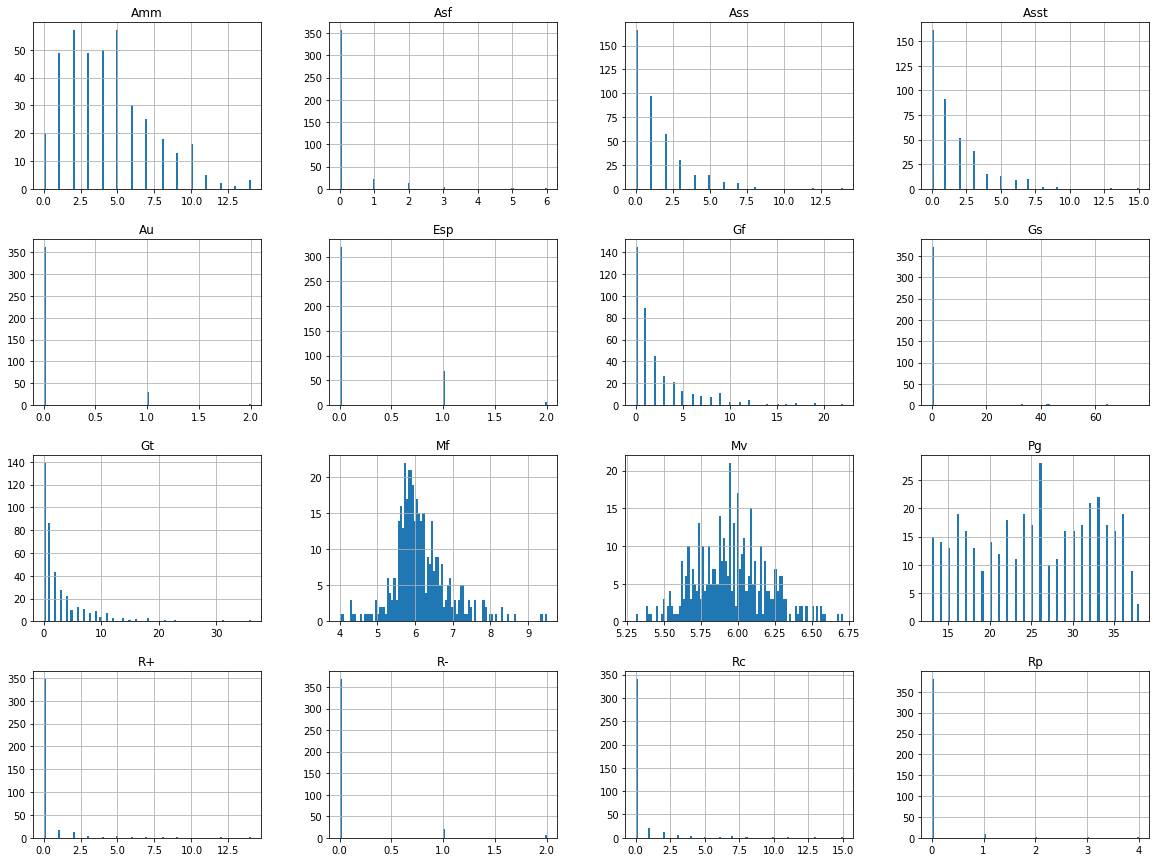

In [5]:
def df_a_part(df,partite):
    ruolo = df[df["Pg"]>=partite] #od in alternativa df.loc[df["Pg"]>=10]
    return ruolo   

def df_gol_assist_tot(ruolo_third):
    gol_tot  = ruolo_third["Gf"]+ ruolo_third["R+"]
    assist_tot = ruolo_third["Ass"] +ruolo_third["Asf"]
    ruolo_third.insert(13,"Gt",gol_tot)
    ruolo_third.insert(16,"Asst",assist_tot)
    return ruolo_third

def df_mv_fv(df,mf=0,mv=0,):
    stat= df[(df["Mv"]>=mv) & (df["Mf"]>=mf)].sort_values(["R"],ascending = False)
    return stat

fc_third = df_a_part(fc,13)
fc_third_tot = df_gol_assist_tot(fc_third)
fc_third_tot = fc_third_tot.drop(["Id"],axis=1)
df_hist(fc_third_tot,100)


**Curiostà** : Ad un primo colpo d'occhio, qualitativamente la media fantavoto e la media voto si distribuiscono gaussianamente intorno al valore Mv = Mf = 6. Si potrebbe eseguire un test di ipotesi per queste due variabili per verificare l'affermazione.

Oltre ad un'attenta *pulizia* dei dati, per avere un quadro completo sul totale dei gol e degli assist fatti da ogni giocatore,ricavabili rispettivamente dalla somma dei valori presenti in ("Gs";"R+") ed ("Ass";"Asf") , abbiamo creato due nuovi campi: "Gt" ed "Asst". Abbiamo ,inoltre, eliminato il campo univico "Id" perché inutile per le analisi. Rivediamo i valori delle correlazioni:

In [6]:
fc_third_tot.corr()

,Pg,Mv,Mf,Gf,Gs,Rp,Rc,R+,R-,Gt,Ass,Asf,Asst,Amm,Esp,Au
Pg,1.000000,0.392182,0.217874,0.370145,0.188039,0.177078,0.215922,0.209931,0.167236,0.368523,0.346677,0.175825,0.364465,0.405005,-0.039574,0.053284
Mv,0.392182,1.000000,0.587807,0.543406,0.240532,0.198920,0.250449,0.257820,0.132483,0.524225,0.467235,0.181658,0.474946,0.014668,-0.115711,-0.170191
Mf,0.217874,0.587807,1.000000,0.839973,-0.468876,-0.289527,0.479559,0.481571,0.305649,0.838018,0.543668,0.159863,0.537495,-0.005331,-0.060752,-0.183348
Gf,0.370145,0.543406,0.839973,1.000000,-0.160295,-0.116419,0.453939,0.443167,0.343759,0.954268,0.450968,0.037774,0.417964,-0.018380,-0.038013,-0.089806
Gs,0.188039,0.240532,-0.468876,-0.160295,1.000000,0.720749,-0.066050,-0.062138,-0.060086,-0.149996,-0.170504,-0.064985,-0.172934,-0.206177,-0.097018,0.037812
Rp,0.177078,0.198920,-0.289527,-0.116419,0.720749,1.000000,-0.047971,-0.045130,-0.043639,-0.108940,-0.126958,-0.047197,-0.128417,-0.141478,-0.079510,0.000506
Rc,0.215922,0.250449,0.479559,0.453939,-0.066050,-0.047971,1.000000,0.986581,0.713001,0.695104,0.146714,0.114684,0.166084,-0.004447,-0.058935,-0.040263
R+,0.209931,0.257820,0.481571,0.443167,-0.062138,-0.045130,0.986581,1.000000,0.588954,0.690892,0.145633,0.117349,0.165892,-0.002870,-0.052090,-0.035124
R-,0.167236,0.132483,0.305649,0.343759,-0.060086,-0.043639,0.713001,0.588954,1.000000,0.473643,0.100797,0.063719,0.109673,-0.009684,-0.068018,-0.048455
Gt,0.368523,0.524225,0.838018,0.954268,-0.149996,-0.108940,0.695104,0.690892,0.473643,1.000000,0.412262,0.069598,0.392401,-0.015780,-0.048028,-0.084140


Verifichiamo quanti sono i dati eliminati dal processo di pulizia e rapportarli alla totalità del dataset. Consideriamo 'rilevanti' i record tali che "Pg" >= 13. 

In [7]:
def presenze(df,num_partite,ruolo):
    presenze = df["Pg"].value_counts()
    numero = 0
    for partite,presenze in presenze.items():
        if partite >= num_partite:
            numero += presenze
    percentage = str(round(((numero/df.shape[0])*100),2)) +'%'
    print("Il numero di %s registrati nell'anno 2019/2020 ed il numero di %s che ha giocato più di %d partite sono rispettivamente %d e %d, con una percentuale del %s." %(ruolo,ruolo,num_partite,df.shape[0],numero,percentage))

    
presenze(fc,13,'giocatori')

Il numero di giocatori registrati nell'anno 2019/2020 ed il numero di giocatori che ha giocato più di 13 partite sono rispettivamente 753 e 395, con una percentuale del 52.46%.


Quindi più di metà del dataset non rispetta i criteri prefissati.

Passiamo ad un'analisi per ruolo dei giocatori presenti. Ripartiamo dal dataset di partenza e su ogni singolo subset opereremo operazioni di data cleaning come nel caso precedente,valutando però di subset in subset i parametri da utilizzare(es. il numero di partite minimo giocate).

In [8]:
portieri = fc[fc["R"]=="P"]
difensori = fc[fc["R"]=="D"]
centrocampisti = fc[fc["R"]=="C"]
attaccanti = fc[fc["R"]=="A"]


## Portieri

Diamo un'occhiata al subset prima di *pulirlo*:

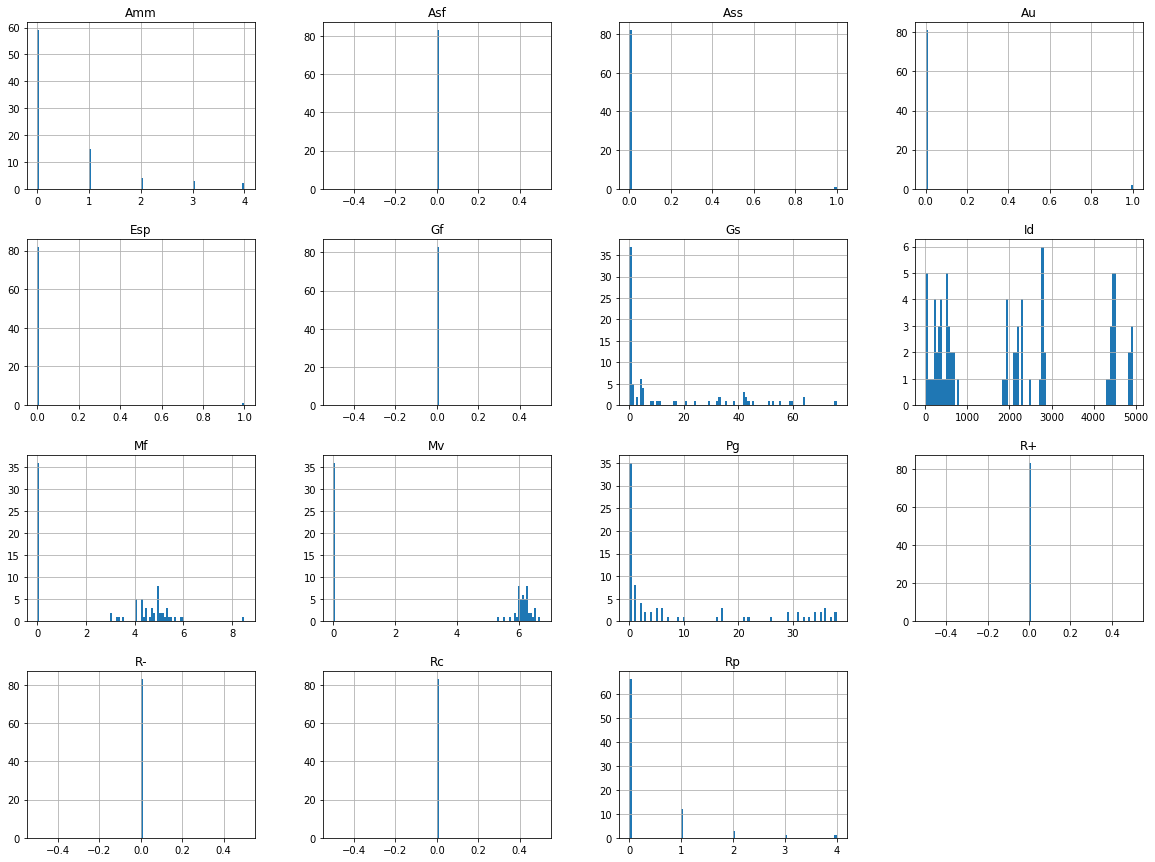

In [9]:
df_hist(portieri,100)

Selezioniamo i portieri che hanno giocato più di dieci partite ("Pg" >= 10),ovvero $\sim$ un quarto della stagione. Tale scelta è dovuta alla minor turnazione dei portieri rispetto agli altri ruoli,avendo così un subset più ampio. 

In [10]:
presenze(portieri,10,'portieri')

Il numero di portieri registrati nell'anno 2019/2020 ed il numero di portieri che ha giocato più di 10 partite sono rispettivamente 83 e 24, con una percentuale del 28.92%.


In [11]:
portieri_ten = df_a_part(portieri,10)
portieri_ten_tot = df_gol_assist_tot(portieri_ten)


In [12]:
portieri_ten_tot.corr()

,Id,Pg,Mv,Mf,Gf,Gs,Rp,Rc,R+,R-,Gt,Ass,Asf,Asst,Amm,Esp,Au
Id,1.000000,-0.334486,-0.106313,-0.239413,NaN,-0.201558,-1.423966e-01,NaN,NaN,NaN,NaN,0.035833,NaN,0.035833,-0.098717,0.183222,-2.207609e-01
Pg,-0.334486,1.000000,0.220135,0.361883,NaN,0.695195,3.916560e-01,NaN,NaN,NaN,NaN,-0.299088,NaN,-0.299088,0.579320,-0.299088,2.300430e-01
Mv,-0.106313,0.220135,1.000000,0.660176,NaN,0.058079,1.823102e-01,NaN,NaN,NaN,NaN,-0.201641,NaN,-0.201641,0.122382,0.300809,-9.081766e-02
Mf,-0.239413,0.361883,0.660176,1.000000,NaN,-0.282518,2.594434e-01,NaN,NaN,NaN,NaN,-0.277979,NaN,-0.277979,-0.004704,0.097542,-3.008658e-01
Gf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gs,-0.201558,0.695195,0.058079,-0.282518,NaN,1.000000,2.871713e-01,NaN,NaN,NaN,NaN,-0.123993,NaN,-0.123993,0.568479,-0.283671,5.133903e-01
Rp,-0.142397,0.391656,0.182310,0.259443,NaN,0.287171,1.000000e+00,NaN,NaN,NaN,NaN,-0.208514,NaN,-0.208514,0.298350,-0.208514,4.184310e-18
Rc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Notiamo come la correlazione fra "Gs" ed "Rp" sia notevolmente diminuita considerando il subset dei portieri, l'unico in cui "Gs" e "Rp" hanno valori $\neq$ 0, dopotutto generalemente nel calcio solo i portieri subiscono gol o parano i rigori. L'eccessiva presenza di record in cui i due campi non sono valorizzati può aver indotto ad un alto valore della correlazione. Eliminiamo dei campi non valorizzati generalmente per quanto riguarda il ruolo del portiere : "Rc","R+" ed "R-"; eliminiamo anche il campo "Id" e ricontrolliamo:

In [13]:
portieri_ten_tot= portieri_ten_tot.drop(["Rc","R+","R-","Id"],axis=1)


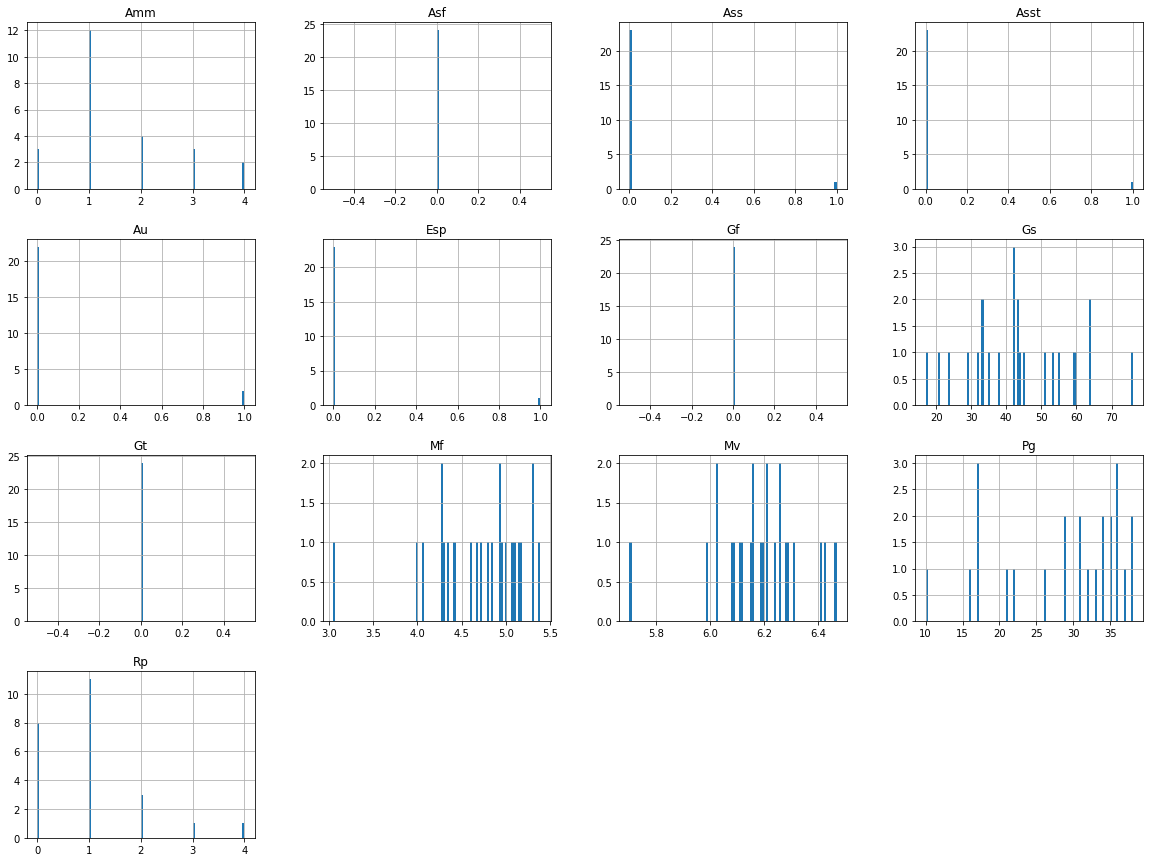

In [14]:
df_hist(portieri_ten_tot,100)


Guardiamo più da vicino le caratteristiche di questo sottinsieme, visualizziamo gli indicatori più significativi:

In [15]:
portieri_ten_tot.describe()

,Pg,Mv,Mf,Gf,Gs,Rp,Gt,Ass,Asf,Asst,Amm,Esp,Au
count,24.000000,24.00000,24.000000,24.0,24.000000,24.000000,24.0,24.000000,24.0,24.000000,24.000000,24.000000,24.000000
mean,28.750000,6.18250,4.695833,0.0,43.541667,1.000000,0.0,0.041667,0.0,0.041667,1.541667,0.041667,0.083333
std,8.367899,0.16109,0.533177,0.0,14.673191,1.021508,0.0,0.204124,0.0,0.204124,1.141287,0.204124,0.282330
min,10.000000,5.70000,3.050000,0.0,17.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,21.750000,6.10500,4.332500,0.0,33.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000
50%,31.500000,6.19500,4.815000,0.0,42.500000,1.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000
75%,35.250000,6.26500,5.082500,0.0,53.500000,1.000000,0.0,0.000000,0.0,0.000000,2.000000,0.000000,0.000000
max,38.000000,6.47000,5.390000,0.0,76.000000,4.000000,0.0,1.000000,0.0,1.000000,4.000000,1.000000,1.000000


La **mean** $\pm$ **std**  è un buon indicatore su cui si può basare la scelta del giocatore per la prossima stagione fantacalcistica, in particolare per quanto riguarda il campo "Gs".

## Difensori

Verifichiamo quanti giocatori nel ruolo di difensore vi sono nel rispettivo subset e quanti hanno giocato almeno un terzo della stagione:

In [16]:
presenze(difensori,13,'difensori')

Il numero di difensori registrati nell'anno 2019/2020 ed il numero di difensori che ha giocato più di 13 partite sono rispettivamente 250 e 139, con una percentuale del 55.6%.


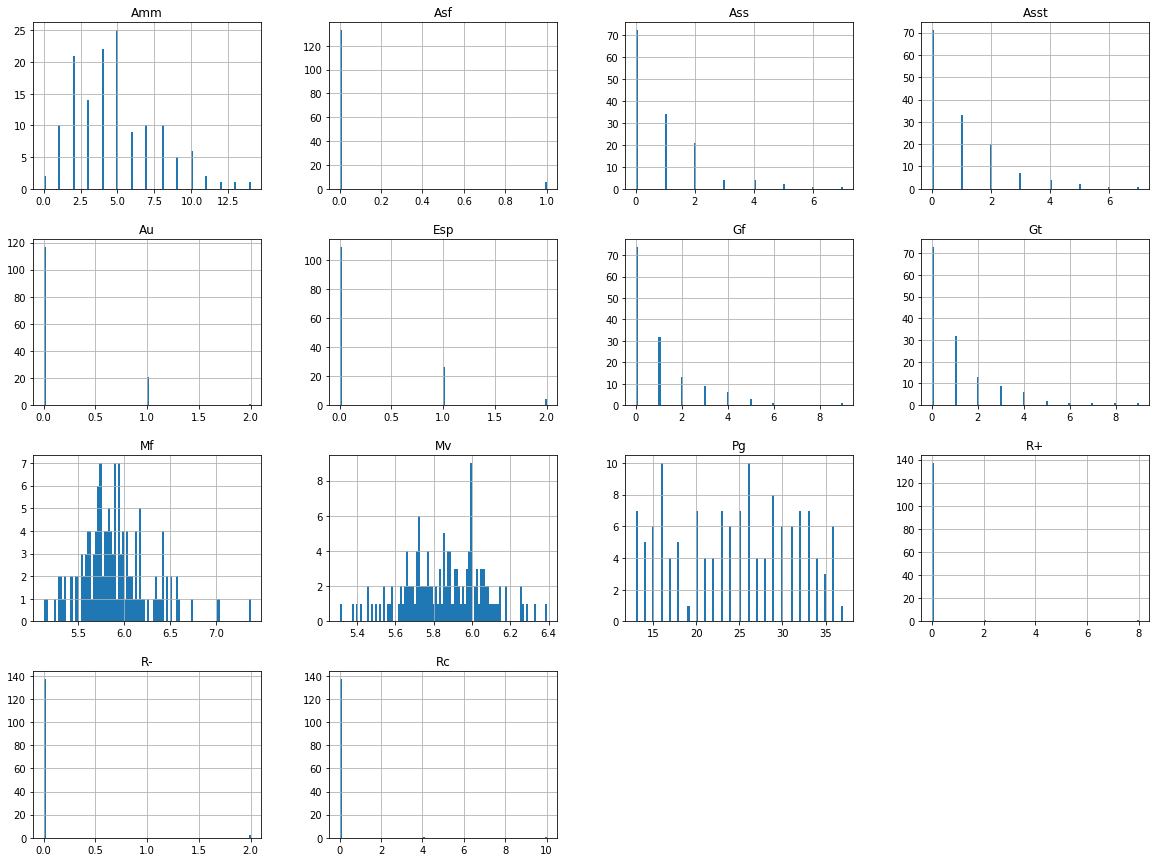

In [17]:
difensori_third = df_a_part(difensori,13)
difensori_third_tot = df_gol_assist_tot(difensori_third)
difensori_third_tot = difensori_third_tot.drop(["Gs","Rp","Id"],axis=1)
df_hist(difensori_third_tot,100)

**Curiostà** :Anche per questo subset, qualitativamente sembra che la media fantavoto e la media voto si distribuiscano gaussianamente intorno ad un valore Mv $\simeq$ Mf < 6. Si potrebbe eseguire un test di ipotesi per queste due variabili per verificare l'affermazione.

In [18]:
difensori_third_tot.corr()

,Pg,Mv,Mf,Gf,Rc,R+,R-,Gt,Ass,Asf,Asst,Amm,Esp,Au
Pg,1.000000,0.344571,0.295512,3.853784e-01,0.051274,4.012339e-02,0.078262,0.366582,0.187727,0.035423,0.188991,0.544168,0.054052,0.093711
Mv,0.344571,1.000000,0.876171,5.184842e-01,0.080722,7.439157e-02,0.090422,0.501770,0.321283,0.124777,0.333212,0.180790,-0.193914,-0.230711
Mf,0.295512,0.876171,1.000000,7.596747e-01,0.207232,1.946582e-01,0.221392,0.771168,0.451148,0.153657,0.464617,0.037727,-0.218118,-0.283191
Gf,0.385378,0.518484,0.759675,1.000000e+00,0.031631,-3.360882e-17,0.120584,0.907491,0.256621,0.164869,0.276075,0.162633,-0.009724,-0.049033
Rc,0.051274,0.080722,0.207232,3.163102e-02,1.000000,9.907527e-01,0.918106,0.444891,-0.029077,0.132391,-0.008284,0.072388,-0.055120,-0.047007
R+,0.040123,0.074392,0.194658,-3.360882e-17,0.990753,1.000000e+00,0.855841,0.420071,-0.040682,0.079800,-0.027639,0.070616,-0.051382,-0.043819
R-,0.078262,0.090422,0.221392,1.205837e-01,0.918106,8.558409e-01,1.000000,0.468942,0.007989,0.271598,0.049158,0.069682,-0.060037,-0.051200
Gt,0.366582,0.501770,0.771168,9.074913e-01,0.444891,4.200708e-01,0.468942,1.000000,0.215792,0.183139,0.238925,0.177252,-0.030408,-0.062904
Ass,0.187727,0.321283,0.451148,2.566209e-01,-0.029077,-4.068154e-02,0.007989,0.215792,1.000000,0.068268,0.988400,0.082775,-0.224587,-0.169532
Asf,0.035423,0.124777,0.153657,1.648691e-01,0.132391,7.979998e-02,0.271598,0.183139,0.068268,1.000000,0.218995,0.009735,-0.105539,0.000652


In [19]:
difensori_third_tot.describe()

,Pg,Mv,Mf,Gf,Rc,R+,R-,Gt,Ass,Asf,Asst,Amm,Esp,Au
count,139.000000,139.000000,139.000000,139.00000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,24.510791,5.854964,5.891799,1.00000,0.100719,0.071942,0.028777,1.071942,0.913669,0.043165,0.956835,4.870504,0.244604,0.165468
std,6.955726,0.207914,0.360511,1.50843,0.911242,0.698241,0.239033,1.662198,1.310393,0.203964,1.339860,2.835680,0.494048,0.391895
min,13.000000,5.310000,5.120000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,5.715000,5.680000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,25.000000,5.870000,5.850000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
75%,30.000000,6.000000,6.060000,1.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.500000,7.000000,0.000000,0.000000
max,37.000000,6.390000,7.380000,9.00000,10.000000,8.000000,2.000000,9.000000,7.000000,1.000000,7.000000,14.000000,2.000000,2.000000


La **mean** $\pm$ **std**  è un buon indicatore su cui si può basare la scelta del giocatore per la prossima stagione fantacalcistica, in particolare per quanto riguarda i campi "Amm" ed "Esp".

## Centrocampisti

Verifichiamo quanti giocatori nel ruolo di centrocampista vi sono nel rispettivo subset e quanti hanno giocato almeno un terzo della stagione:

In [20]:
presenze(centrocampisti,13,'centrocampisti')

Il numero di centrocampisti registrati nell'anno 2019/2020 ed il numero di centrocampisti che ha giocato più di 13 partite sono rispettivamente 262 e 152, con una percentuale del 58.02%.


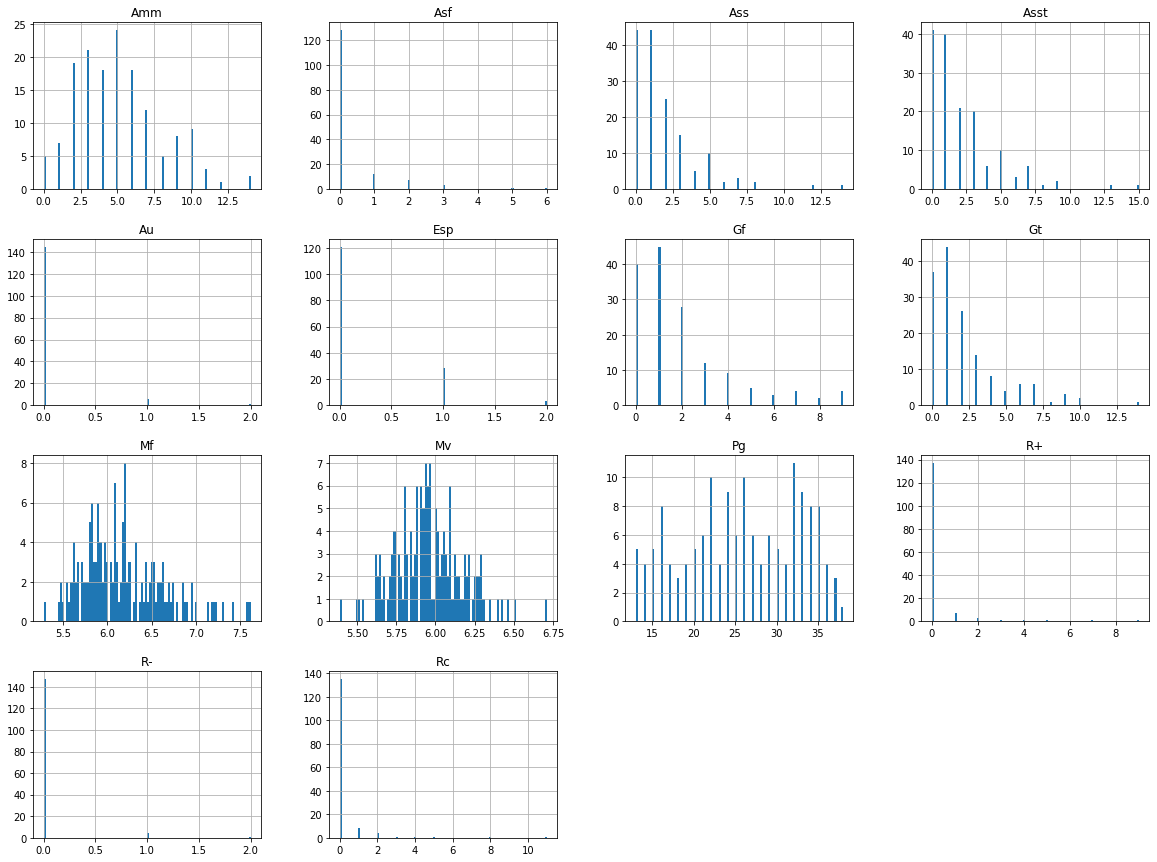

In [21]:
centrocampisti_third= df_a_part(centrocampisti,13)
centrocampisti_third_tot = df_gol_assist_tot(centrocampisti_third)
centrocampisti_third_tot = centrocampisti_third_tot.drop(["Gs","Rp","Id"],axis=1)
df_hist(centrocampisti_third_tot,100)

**Curiostà** :Anche per questo subset, qualitativamente sembra che la media fantavoto e la media voto si distribuiscano gaussianamente intorno ad un valore Mv $\simeq$ Mf $\simeq$ 6. Si potrebbe eseguire un test di ipotesi per queste due variabili per verificare l'affermazione.

In [22]:
centrocampisti_third_tot.corr()

,Pg,Mv,Mf,Gf,Rc,R+,R-,Gt,Ass,Asf,Asst,Amm,Esp,Au
Pg,1.000000,0.410694,0.367434,0.410371,0.209169,0.196604,0.206437,0.439005,0.468861,0.260754,0.509712,0.499239,-0.069779,0.006191
Mv,0.410694,1.000000,0.854773,0.575789,0.163718,0.158655,0.138100,0.564320,0.568631,0.222406,0.585753,0.143276,-0.060022,-0.076695
Mf,0.367434,0.854773,1.000000,0.812392,0.338366,0.334046,0.255188,0.844770,0.607110,0.211763,0.616514,-0.079668,-0.108964,-0.130124
Gf,0.410371,0.575789,0.812392,1.000000,0.120846,0.090543,0.232649,0.898557,0.485707,0.043535,0.449735,0.013919,-0.047425,0.005093
Rc,0.209169,0.163718,0.338366,0.120846,1.000000,0.990547,0.737871,0.540266,0.000426,0.250160,0.086817,0.001486,-0.005766,-0.051118
R+,0.196604,0.158655,0.334046,0.090543,0.990547,1.000000,0.638311,0.518412,-0.001596,0.243075,0.082559,-0.001802,-0.002192,-0.050858
R-,0.206437,0.138100,0.255188,0.232649,0.737871,0.638311,1.000000,0.481048,0.010242,0.207808,0.080968,0.017207,-0.021573,-0.036620
Gt,0.439005,0.564320,0.844770,0.898557,0.540266,0.518412,0.481048,1.000000,0.416353,0.144496,0.422550,0.011158,-0.041688,-0.018039
Ass,0.468861,0.568631,0.607110,0.485707,0.000426,-0.001596,0.010242,0.416353,1.000000,0.128779,0.939465,0.078338,-0.124007,0.012294
Asf,0.260754,0.222406,0.211763,0.043535,0.250160,0.243075,0.207808,0.144496,0.128779,1.000000,0.460775,0.150728,-0.021212,-0.073239


In [23]:
centrocampisti_third_tot.describe()

,Pg,Mv,Mf,Gf,Rc,R+,R-,Gt,Ass,Asf,Asst,Amm,Esp,Au
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,25.671053,5.964408,6.182105,1.947368,0.309211,0.269737,0.039474,2.217105,1.868421,0.302632,2.171053,5.046053,0.223684,0.052632
std,6.928945,0.214361,0.462094,2.173865,1.272394,1.115635,0.226741,2.531700,2.251370,0.869189,2.515584,2.925881,0.463179,0.251867
min,13.000000,5.390000,5.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.750000,5.820000,5.840000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,26.000000,5.950000,6.095000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,5.000000,0.000000,0.000000
75%,32.000000,6.090000,6.480000,3.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,3.000000,7.000000,0.000000,0.000000
max,38.000000,6.710000,7.620000,9.000000,11.000000,9.000000,2.000000,14.000000,14.000000,6.000000,15.000000,14.000000,2.000000,2.000000


La mean  ±  std è un buon indicatore su cui si può basare la scelta del giocatore per la prossima stagione fantacalcistica, in particolare per quanto riguarda i campi "Asst" e "Gt" .

## Attaccanti

Verifichiamo quanti giocatori nel ruolo di attaccante vi sono nel rispettivo subset e quanti hanno giocato almeno un terzo della stagione:

In [24]:
presenze(attaccanti,13,'attaccanti')

Il numero di attaccanti registrati nell'anno 2019/2020 ed il numero di attaccanti che ha giocato più di 13 partite sono rispettivamente 158 e 81, con una percentuale del 51.27%.


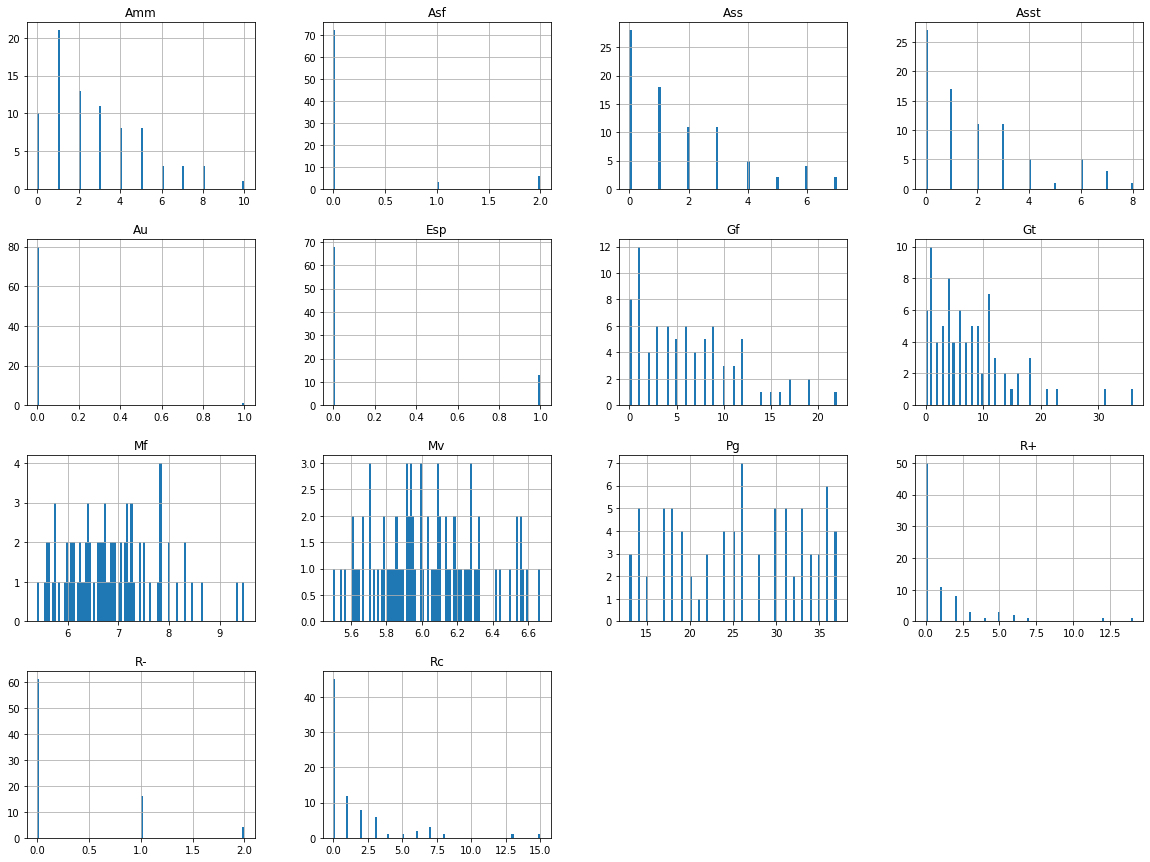

In [25]:
attaccanti_third= df_a_part(attaccanti,13)
attaccanti_third_tot = df_gol_assist_tot(attaccanti_third)
attaccanti_third_tot = attaccanti_third_tot.drop(["Gs","Rp","Id"],axis=1)
df_hist(attaccanti_third_tot,100)

In [27]:
attaccanti_third_tot.corr()

,Pg,Mv,Mf,Gf,Rc,R+,R-,Gt,Ass,Asf,Asst,Amm,Esp,Au
Pg,1.000000,0.412349,0.457960,0.679424,0.398622,0.386982,0.267461,0.665465,0.493145,0.170945,0.488106,0.396901,-0.037790,0.152357
Mv,0.412349,1.000000,0.922930,0.757122,0.351628,0.374722,0.086619,0.720805,0.673441,0.207461,0.659778,0.142569,0.028182,0.051260
Mf,0.457960,0.922930,1.000000,0.878693,0.526248,0.552848,0.165268,0.879877,0.663887,0.060170,0.612742,0.146039,-0.014447,0.072401
Gf,0.679424,0.757122,0.878693,1.000000,0.473646,0.480330,0.225981,0.946670,0.639222,-0.073302,0.555723,0.315765,-0.008861,0.058910
Rc,0.398622,0.351628,0.526248,0.473646,1.000000,0.984228,0.610861,0.726374,0.306711,-0.040298,0.265309,0.220905,-0.107676,0.260134
R+,0.386982,0.374722,0.552848,0.480330,0.984228,1.000000,0.461167,0.737316,0.303533,-0.013819,0.269362,0.207602,-0.095569,0.259823
R-,0.267461,0.086619,0.165268,0.225981,0.610861,0.461167,1.000000,0.343468,0.179934,-0.140284,0.125201,0.178889,-0.112362,0.141933
Gt,0.665465,0.720805,0.879877,0.946670,0.726374,0.737316,0.343468,1.000000,0.603844,-0.061535,0.526979,0.319472,-0.041933,0.140821
Ass,0.493145,0.673441,0.663887,0.639222,0.306711,0.303533,0.179934,0.603844,1.000000,0.262274,0.967761,0.216257,0.006611,0.074723
Asf,0.170945,0.207461,0.060170,-0.073302,-0.040298,-0.013819,-0.140284,-0.061535,0.262274,1.000000,0.496872,-0.095612,0.036447,-0.037861


In [29]:
attaccanti_third_tot.describe()

,Pg,Mv,Mf,Gf,Rc,R+,R-,Gt,Ass,Asf,Asst,Amm,Esp,Au
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,25.728395,6.031111,6.848642,6.259259,1.530864,1.234568,0.296296,7.493827,1.740741,0.185185,1.925926,2.777778,0.160494,0.012346
std,7.584544,0.282874,0.872268,5.233970,2.797706,2.496355,0.557773,6.795446,1.895902,0.550252,2.108185,2.296737,0.369350,0.111111
min,13.000000,5.500000,5.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,5.830000,6.230000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,26.000000,6.000000,6.720000,5.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000
75%,33.000000,6.220000,7.280000,9.000000,2.000000,1.000000,0.000000,11.000000,3.000000,0.000000,3.000000,4.000000,0.000000,0.000000
max,37.000000,6.670000,9.490000,22.000000,15.000000,14.000000,2.000000,36.000000,7.000000,2.000000,8.000000,10.000000,1.000000,1.000000


La mean ± std è un buon indicatore su cui si può basare la scelta del giocatore per la prossima stagione fantacalcistica, in particolare per quanto riguarda i campi "Rc", "Gt" e "Asst" .

## Analisi per squadra e/o per ruolo

In questa sezione possiamo focalizzare l'attenzione su ogni singola squadra, passata come parametro. Passando i subset creati precedentemente possiamo anche effettuare un'analisi per ruolo.

In [31]:
def analisi_squadra(df,squadra):
    stat= df[df["Squadra"]==squadra].sort_values(["R"],ascending = False)
    return stat,stat.describe()

analisi_squadra(fc_third_tot,"Atalanta")

(     R         Nome   Squadra  Pg    Mv    Mf  Gf  Gs  Rp  Rc  R+  R-  Gt  \
 196  P      GOLLINI  Atalanta  33  6.15  4.83   0  42   0   0   0   0   0   
 220  D        TOLOI  Atalanta  33  6.18  6.35   2   0   0   0   0   0   2   
 235  D     DJIMSITI  Atalanta  34  6.07  6.21   2   0   0   0   0   0   2   
 248  D      CALDARA  Atalanta  14  5.77  5.81   0   0   0   0   0   0   0   
 324  D     HATEBOER  Atalanta  32  5.88  5.85   0   0   0   0   0   0   0   
 331  D       GOSENS  Atalanta  34  6.39  7.38   9   0   0   0   0   0   9   
 348  D     PALOMINO  Atalanta  30  5.97  6.05   2   0   0   0   0   0   2   
 357  D     CASTAGNE  Atalanta  27  6.08  6.18   1   0   0   0   0   0   1   
 7    C      DE ROON  Atalanta  35  5.97  6.06   2   0   0   0   0   0   2   
 8    C        GOMEZ  Atalanta  36  6.71  7.62   7   0   0   0   0   0   7   
 236  C      FREULER  Atalanta  31  6.05  6.23   2   0   0   0   0   0   2   
 310  C      PASALIC  Atalanta  35  6.15  6.88   9   0   0   0  